# 🌍Mapa krajov Solvenskej republiky 🗺

##   GIS, Python, SQL

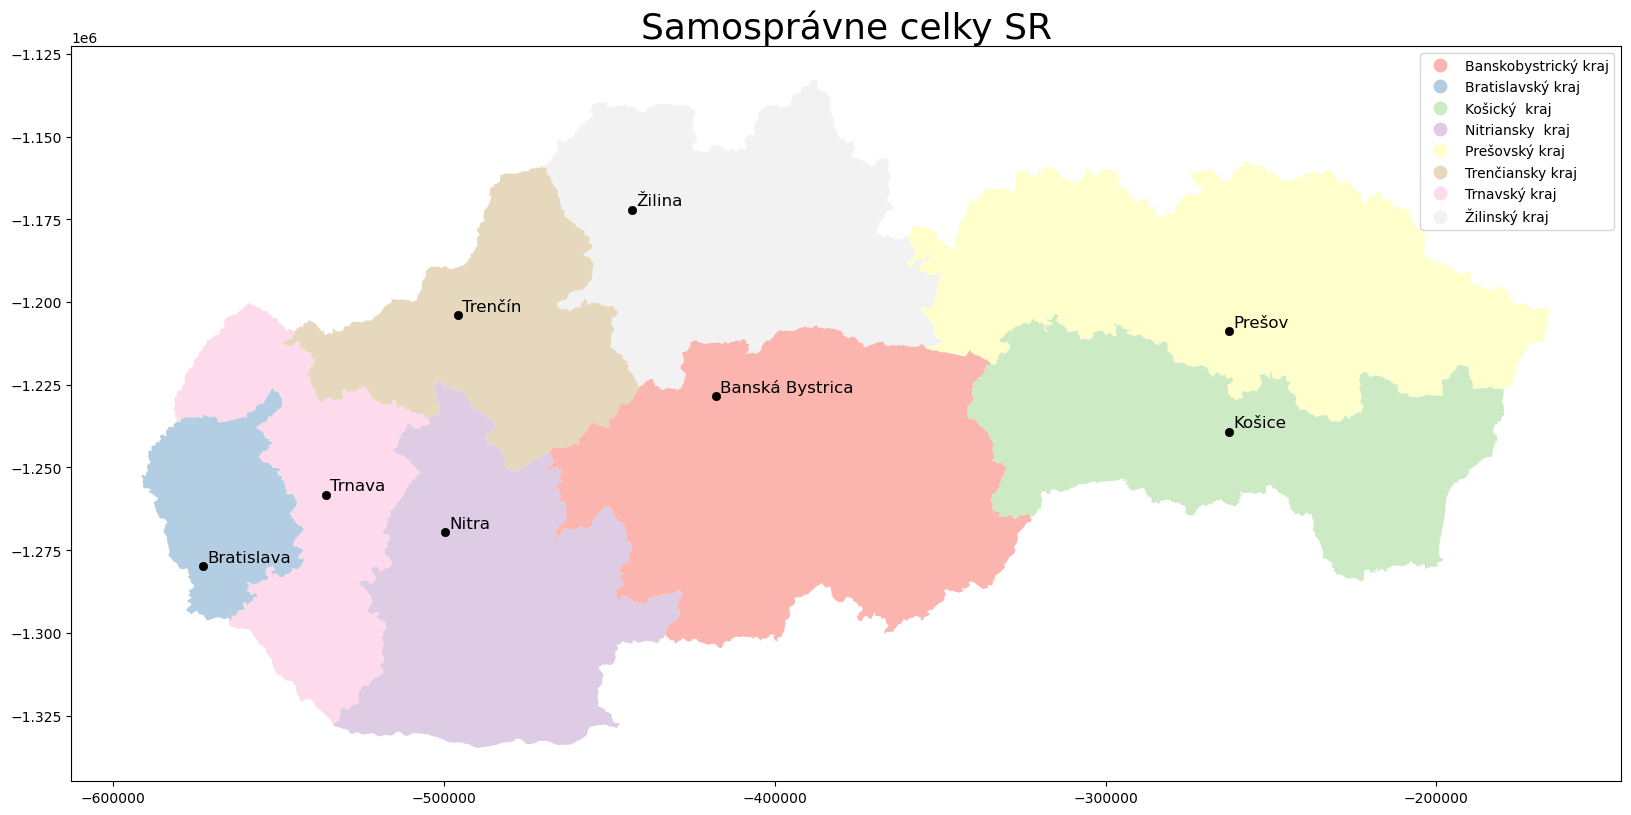

In [1]:
import os
import geopandas as gpd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from dotenv import load_dotenv

#Načítanie knižnice dotenv na zabezpečenie skrytých premenných
load_dotenv()

#Prihlasovacie údaje na pripojenie k databáze sú chránené pomocou skrytých premenných. 
host = os.getenv("p_host")
port = int(os.getenv("p_port")) #port je integer - potreba konverzie
database = os.getenv("p_database")
user = os.getenv("p_user")
password = os.getenv("p_password")

#Pomocou knižnice sqlalchemy vytvoríme pripojenie na databázu. 
db_connection_url = f"postgresql://{user}:{password}@{host}/{database}"
con = create_engine(db_connection_url) 

#Načítanie dát prvej polygónovej vrstvy (hranice krajov SR) z databázy do GeoDataFrame pomocou SQL dopytu.
sql_kraje = "SELECT * FROM hranice_kraje_1"

# Načítanie dát druhej bodovej vrstvy (mestá) z databázy do GeoDataFrame pomocou SQL dopytu, kde bol vybraný zoznam krajských miest
sql_mesta = "SELECT * FROM mesta WHERE nm4 IN ('Žilina', 'Trnava', 'Trenčín', 'Nitra', 'Banská Bystrica', 'Košice', 'Prešov', 'Bratislava' )"

#Načítanie databázy zo zadaného SQL dopytu
gdf_kraje = gpd.read_postgis(sql_kraje, con, geom_col='geom', crs = 5514)
gdf_mesta = gpd.read_postgis(sql_mesta, con, geom_col='geom', crs = 5514)

# Vytvorenie mapy a nastavenie rozsahu osí
fig, ax = plt.subplots(figsize=(20, 20))  # Zmena veľkosti mapy (20x20 inch)

# Vizualizácia dát s farebným odlíšením podľa hodnôt atribútu "nm4"
gdf_kraje.plot(ax=ax, column='nm4', legend=True, cmap='Pastel1') # Môžete zmeniť cmap na inú farbovú mapu podľa svojich preferencií
gdf_mesta.plot(ax=ax, color='black', edgecolor='black', linewidth=0.5)

# Pridanie názvov miest pomocou cyklu for a metódy annotate
for x, y, label in zip(gdf_mesta.geometry.centroid.x, gdf_mesta.geometry.centroid.y, gdf_mesta['nm4']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=12, color='black')

plt.title("Samosprávne celky SR", fontsize = 26)
plt.show()